# <center>KNN classification avec *scikit-learn*: cas 2 </center>

## Classification multi-classe

Nous avons jusqu'à maintenant utilisé l'algorithme des *k* plus proches voisins pour réaliser de la classification binaire (2 classes). Nous allons maintenant l'utiliser pour réaliser de la classification multi-classe. Nous travaillerons avec le jeu de données *iris*. 
Les données comprennent 150 individus et sont séparées en 2 ensembles. 
- dans le premier ensemble, un individu est représenté par un t_uple qui correspond à la longueur du sépale, la largeur du sépale, la longueur du pétale et à la largeur du pétale. 
- le second ensemble est complémentaire du premier. Il stocke dans chaque ligne, le type d'iris correspondant au t_uple du premier. Les types d'iris sont répartis en 3 classes: *Setosa*, *Versicolor* ou *Virginica*. 

Ce jeu de données est très souvent utilisé pour tester des algorithmes de classification. Le problème à résoudre est de prédire le second ensemble à l'aide du premier.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# chargement du dataset de fleur d'iris
iris = load_iris()
X = iris.data # X comprend les caractéristiques
Y = iris.target # Y comprend les classes

### Etude des données

Avant d'utiliser un algorithme d'apprentissage, il faut étudier les données afin de connaître ce qui va être manipulé: leur type, leur plage de valeur, leur répartition par classe. Mais aussi, ceci peut permettre d'avoir une intuition des relations potentielles entre certaines caractéristiques et orienté ainsi le choix d'un type de méthodes d'apprentissage à mettre en place. 

- Afficher la taille (shape) de X et de Y  et le type des données qu'ils contiennent  
- Afficher les données  
- Représenter graphiquement les données => voir ci-dessous le graphique final qui est demandé (vous pouvez vous aider de ce [tutoriel](http://www.python-simple.com/python-matplotlib/pyplot.php))
  1) réaliser des histogrammes pour visualiser la répartition des données de X pour chaque caractéristique
  2) réaliser un camembert pour visualiser la répartition des différents types d'iris.


<p align="center">
<img src="images/iris1.png" />
</p>

Taille de X: (150, 4)
Type de X: <class 'numpy.ndarray'>
Taille de Y: (150,)
Type de Y: <class 'numpy.ndarray'>
Données X:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5

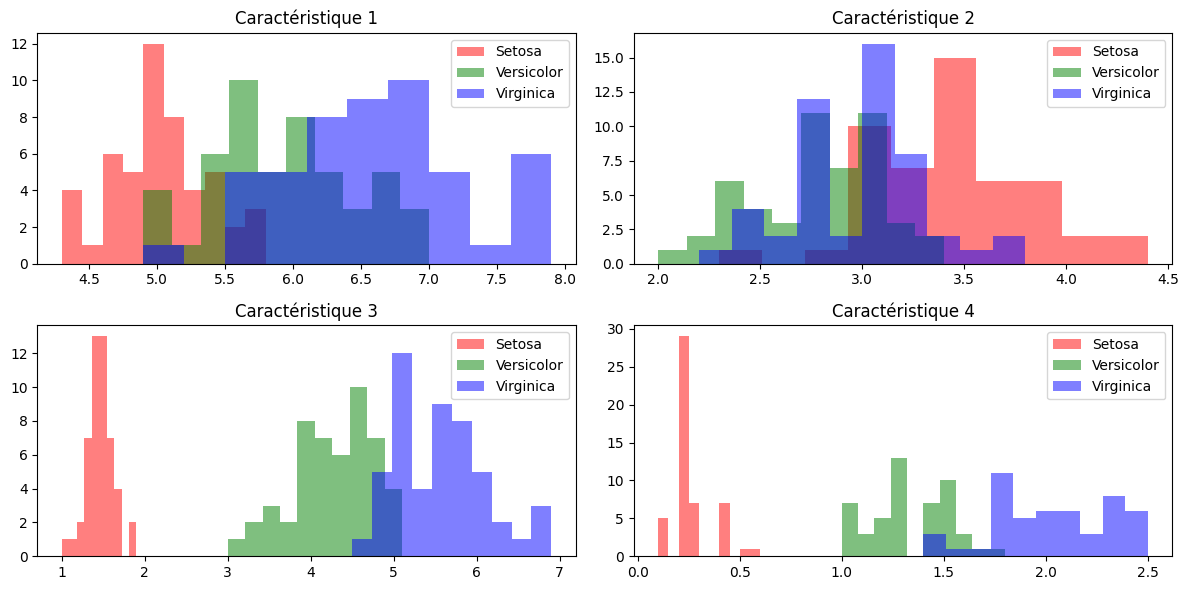

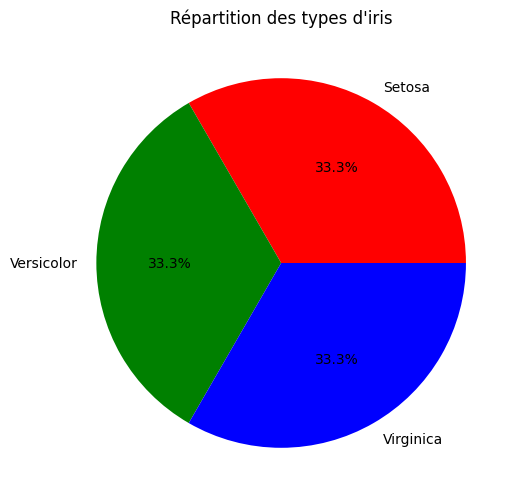

In [3]:
## Chargement du dataset Iris
iris = load_iris()
X = iris.data  # X comprend les caractéristiques
Y = iris.target  # Y comprend les classes

## Afficher la taille (shape) de X et de Y et le type des données
print("Taille de X:", X.shape)
print("Type de X:", type(X))
print("Taille de Y:", Y.shape)
print("Type de Y:", type(Y))

## Afficher les données
print("Données X:")
print(X)
print("Classes Y:")
print(Y)

## Réaliser des histogrammes pour visualiser la répartition des données de X pour chaque caractéristique
plt.figure(figsize=(12, 6))
for i in range(X.shape[1]):
    plt.subplot(2, 2, i + 1)
    plt.hist(X[Y == 0, i], color='r', alpha=0.5, label='Setosa')
    plt.hist(X[Y == 1, i], color='g', alpha=0.5, label='Versicolor')
    plt.hist(X[Y == 2, i], color='b', alpha=0.5, label='Virginica')
    plt.title(f'Caractéristique {i + 1}')
    plt.legend()

plt.tight_layout()

## Réaliser un camembert pour visualiser la répartition des différents types d'iris
plt.figure(figsize=(6, 6))
labels = ['Setosa', 'Versicolor', 'Virginica']
sizes = [np.sum(Y == 0), np.sum(Y == 1), np.sum(Y == 2)]
colors = ['r', 'g', 'b']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title("Répartition des types d'iris")
plt.show()

> Que constatez vous à la lecture de ces graphiques ?

Nous allons maintenant étudier plus en détail la caractéristique *longueur de sépale*. Reproduisez la représentation graphique suivante:

<p align="center">
<img src="images/iris2.png" />
</p>




> Que constatez vous ?

### Prétraitement des données

Nous avons vu précédemment que les valeurs associées aux données ne sont pas dans le même intervalle de valeurs, nous allons donc maintenant les standardiser. Ce traitement est important car il permet de mettre les variables à la même échelle. Les algorithmes d'apprentissage automatique fonctionnent ainsi de manière plus efficace et donnent de meilleurs résultats. Sans standardisation, des variables avec des plages de valeurs très différentes peuvent biaiser les modèles en privilégiant les variables avec des valeurs plus élevées.  
- Réaliser la standardisation en utilisant la classe *StandardScaler* et sa méthode *fit_transform(...)*
- Réafficher le même graphique que le précédent pour visualiser les effets du traitement.

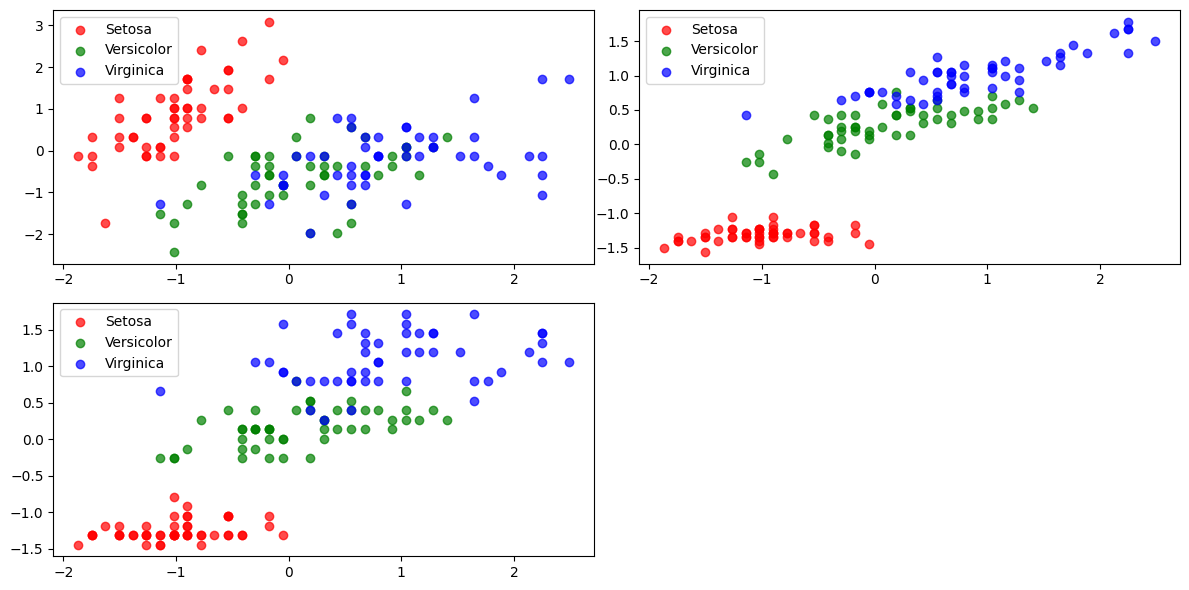

In [24]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_std=scaler.fit_transform(X)

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.scatter(X_std[Y == 0, 0],X_std[Y == 0, 1], color='r', alpha=0.7, label='Setosa')
plt.scatter(X_std[Y == 1, 0],X_std[Y == 1, 1], color='g', alpha=0.7, label='Versicolor')
plt.scatter(X_std[Y == 2, 0],X_std[Y == 2, 1], color='b', alpha=0.7, label='Virginica')
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(X_std[Y == 0, 0],X_std[Y == 0, 2], color='r', alpha=0.7, label='Setosa')
plt.scatter(X_std[Y == 1, 0],X_std[Y == 1, 2], color='g', alpha=0.7, label='Versicolor')
plt.scatter(X_std[Y == 2, 0],X_std[Y == 2, 2], color='b', alpha=0.7, label='Virginica')
plt.legend()

plt.subplot(2, 2, 3)
plt.scatter(X_std[Y == 0, 0],X_std[Y == 0, 3], color='r', alpha=0.7, label='Setosa')
plt.scatter(X_std[Y == 1, 0],X_std[Y == 1, 3], color='g', alpha=0.7, label='Versicolor')
plt.scatter(X_std[Y == 2, 0],X_std[Y == 2, 3], color='b', alpha=0.7, label='Virginica')
plt.legend()

plt.tight_layout()

### Prédiction des classes de l'ensemble de test

- Commencez par séparer le jeu de données en un ensemble d'apprentissage et en un ensemble de test (80% apprentissage, 20% test). Vous travaillez bien sûr avec les données standardisées et sur toutes les données (4 caractéristiques)

- Réaliser la classification avec *k=3*, calculer l'exactitude de la prédiction et afficher la matrice de confusion.

- Donner la micro-moyenne et la macro-moyenne par rapport à la précision.


In [40]:
# Séparation en ensemble d'apprentissage et ensemble de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Création du modèle KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, Y_train)

# Prédiction sur l'ensemble de test
Y_pred = knn.predict(X_test_std)

# Calcul de l'exactitude
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Exactitude de la prédiction : {accuracy:.4f}')

# Affichage de la matrice de confusion
conf_matrix = confusion_matrix(Y_test, Y_pred)
print('\nMatrice de Confusion :')
print(conf_matrix)

# Calcul de la précision pour chaque classe
precision_per_class = precision_score(Y_test, Y_pred, average=None)

# Micro-moyenne de la précision
micro_precision = precision_score(Y_test, Y_pred, average='micro')

# Macro-moyenne de la précision
macro_precision = precision_score(Y_test, Y_pred, average='macro')

print('\nPrécision par classe :', precision_per_class)
print(f'\nMicro-moyenne de la précision : {micro_precision:.4f}')
print(f'Macro-moyenne de la précision : {macro_precision:.4f}')

Exactitude de la prédiction : 0.9333

Matrice de Confusion :
[[ 8  0  0]
 [ 0  9  0]
 [ 0  2 11]]

Précision par classe : [1.         0.81818182 1.        ]

Micro-moyenne de la précision : 0.9333
Macro-moyenne de la précision : 0.9394


### Détermination de la valeur optimale de *k*

#### Calcul de l'exactitude en fonction de différentes valeurs de *k*

Nous avons utilisé une valeur de *k* arbitraire comme paramètre du classifieur. 
Nous allons maintenant utiliser la technique de la validation croisée pour trouver la meilleure valeur de *k* pour nos données (le nombre de données étant restreint) 
> - Nous allons tester différentes valeurs de *k* (1..20). 
> - Pour chaque valeur de *k*, nous allons trouver le score moyen obtenu (exactitude) en réalisant une validation croisée à 10 plis (ou folds).
>- Le meilleur *k* obtenu sera celui qui maximise l'exactitude calculée.

Mettez en place ce traitement.
- Réaliser une représentation graphique des valeurs obtenues pour l'exactitude en fonction des différentes valeurs de *k*
- Afficher la valeur de *k* optimale. 



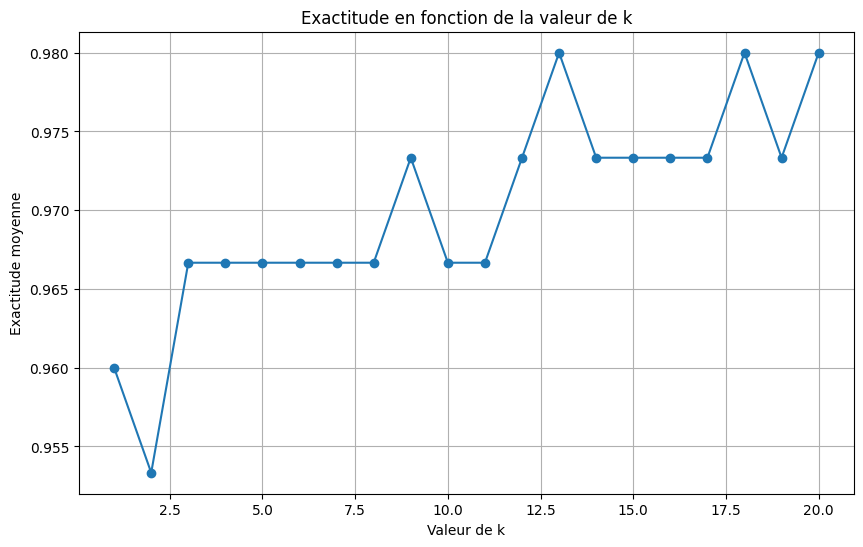

La valeur optimale de k est : 13


In [50]:
from sklearn.model_selection import cross_val_score

# Définir les valeurs de k à tester
k_values = np.arange(1, 21)

# Liste pour stocker les scores moyens de la validation croisée pour chaque k
mean_scores = []

# Effectuer la validation croisée pour chaque valeur de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    mean_scores.append(np.mean(scores))

# Tracer la courbe de l'exactitude en fonction de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o', linestyle='-')
plt.title('Exactitude en fonction de la valeur de k')
plt.xlabel('Valeur de k')
plt.ylabel('Exactitude moyenne')
plt.grid(True)
plt.show()

# Trouver la valeur optimale de k
optimal_k = k_values[np.argmax(mean_scores)]
print(f'La valeur optimale de k est : {optimal_k}')

Tester la valeur optimale de *k* que vous avez déterminée précèdemment.
 

Vous avez vu à l'aide de la seconde représentation graphique demandée que les données peuvent être relativement bien séparées en utilisant seulement 2 caractéristiques. Recommencer la classification en n'utilisant que ces  2 caractéristiques du jeu de données. Que constatez vous ?

## Pour aller plus loin

- étude de l'influence de paramètres autre que *k* de *KneighborsClassifier*

- Réaliser des classifications sur d'autres jeux de données qui ont déjà été vus (MNIST, Titanic)


In [3]:
#TODO